#### Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

#### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

#### Importing the Important  Libraries 

In [32]:
# Importing the Libraries 
import pandas as pds
import numpy as nps
import seaborn as snsb
import matplotlib.pyplot as pyplt


#### Highlighting the maximum values of each attribute in the data set which repersent in red color

In [33]:
dataf = pds.read_csv('happiness_score_dataset.csv')
# printig the first 10 value of dataset
dataf.head(100)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799


In [34]:
origin = dataf.copy()
def highlightmax(h):
    is_max = h ==h.max()
    return['background-color: red' if v else''for v in is_max]

dataf.style.apply(highlightmax, subset = ['Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


In [35]:
dataf.shape

(158, 12)

In [36]:
dataf.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [37]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Finding ot the attributes which are highly  corelated to each other through the heatmap

<AxesSubplot:>

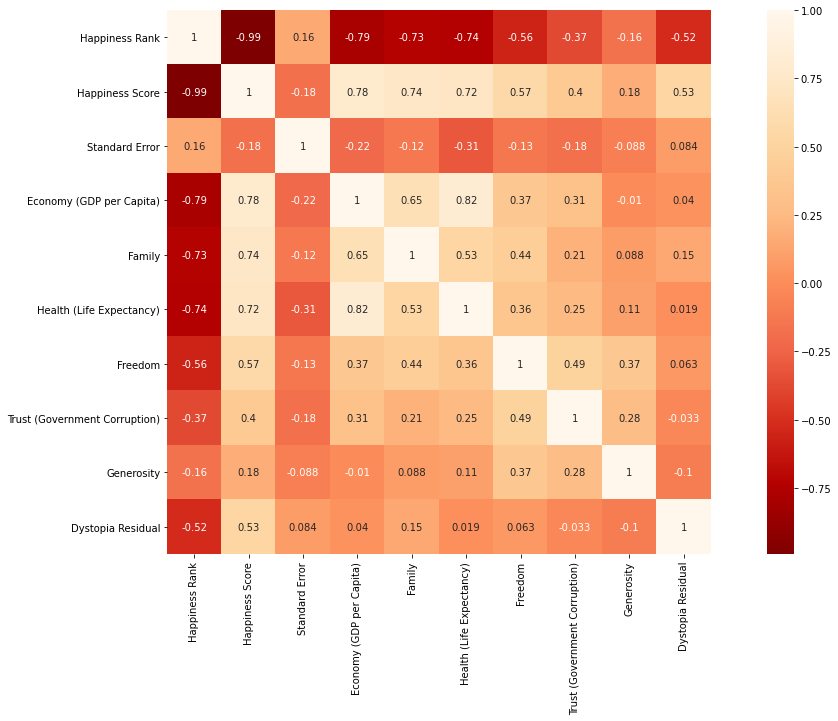

In [38]:
cormat = dataf.corr()
f,ax = pyplt.subplots(figsize=(20, 10))
snsb.heatmap(cormat, square = True, annot = True, cmap='OrRd_r',ax = ax)


In the above heat map we can see that the Happiness Score is highly related with Economy, Family, Health and somewhat related to  Freedom, but has low relation with Trust in Government.

##### Correlation with Eastern Asia

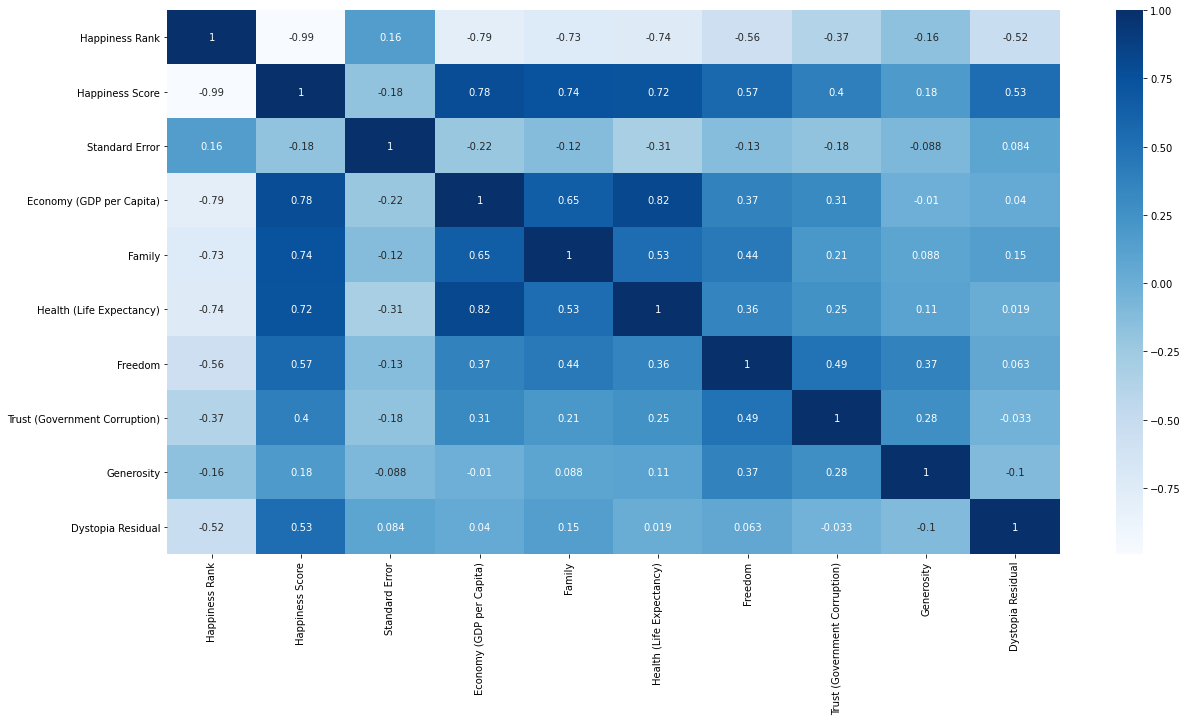

In [39]:
pyplt.rcParams['figure.figsize'] = (20, 10)

esternasia= dataf.loc[lambda dataf: dataf['Region'] == 'Eastern Asia']
snsb.heatmap(dataf.corr(), cmap = 'Blues', annot = True)

pyplt.show()

Here the Economy has shown the worst number with Family, Generosity and Trust In Government.

#### Economy VS Family VS Health VS Freedom VS Generosity VS Trust In Government of

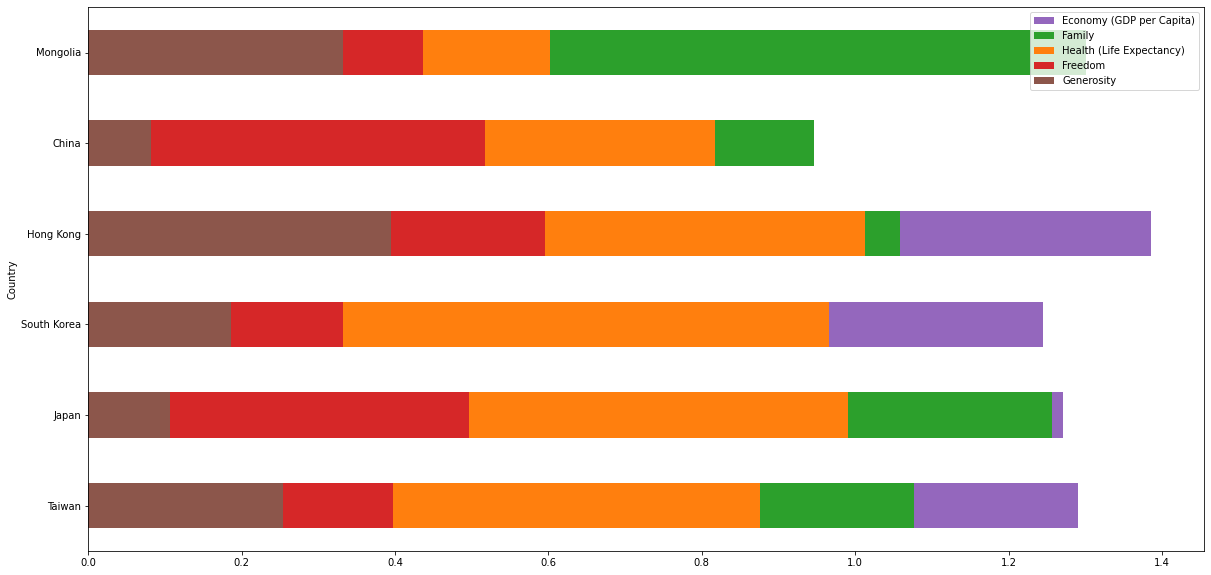

In [40]:
ax = esternasia.plot(y="Economy (GDP per Capita)", x="Country", kind='barh',color='C4')
esternasia.plot(y="Family", x="Country", kind="barh", ax=ax, color="C2")
esternasia.plot(y="Health (Life Expectancy)", x="Country", kind="barh", ax=ax, color="C1")
esternasia.plot(y="Freedom", x="Country", kind="barh", ax=ax, color="C3")
esternasia.plot(y="Generosity", x="Country", kind="barh", ax=ax, color="C5")
pyplt.show()


#### Corelation with Western  Europe  

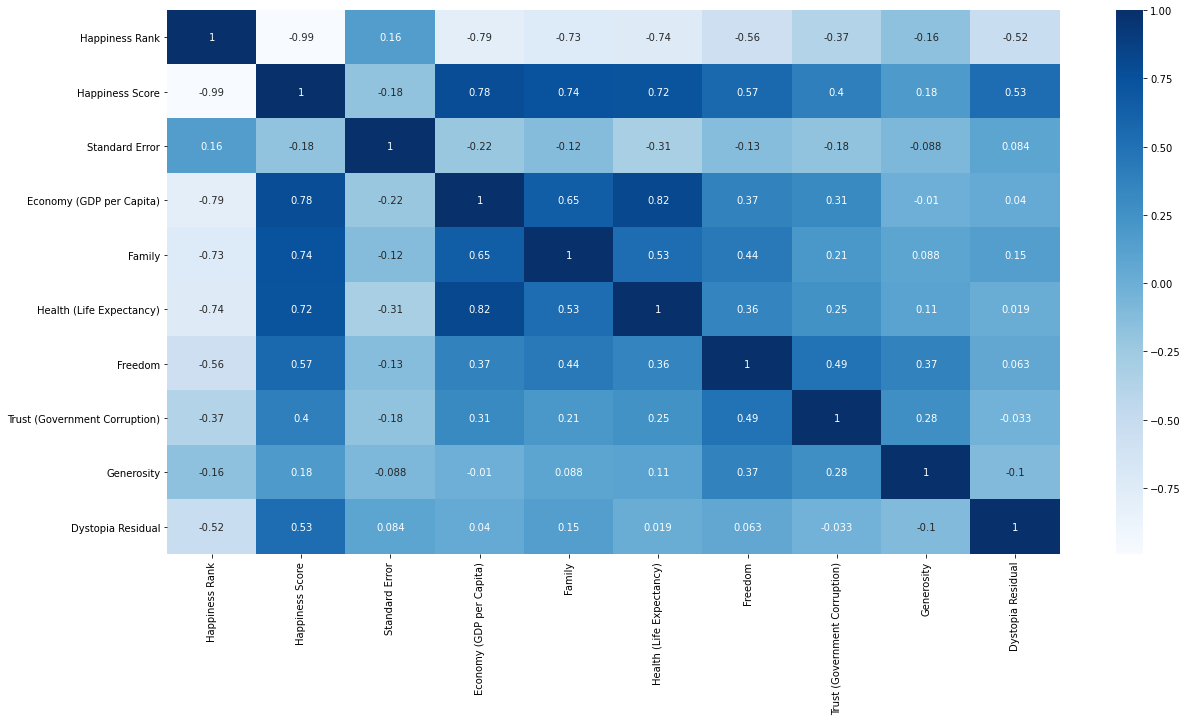

In [41]:
pyplt.rcParams['figure.figsize'] = (20, 10)

we = dataf.loc[lambda dataf: dataf['Region'] == 'Western Europe']
snsb.heatmap(dataf.corr(), cmap = 'Blues', annot = True)

pyplt.show()

Here the Happiness Score shows the good correlation with the Econony, Family, Turst Freedom  whereas the Health is the Lowest. 

#### Correlation with North America

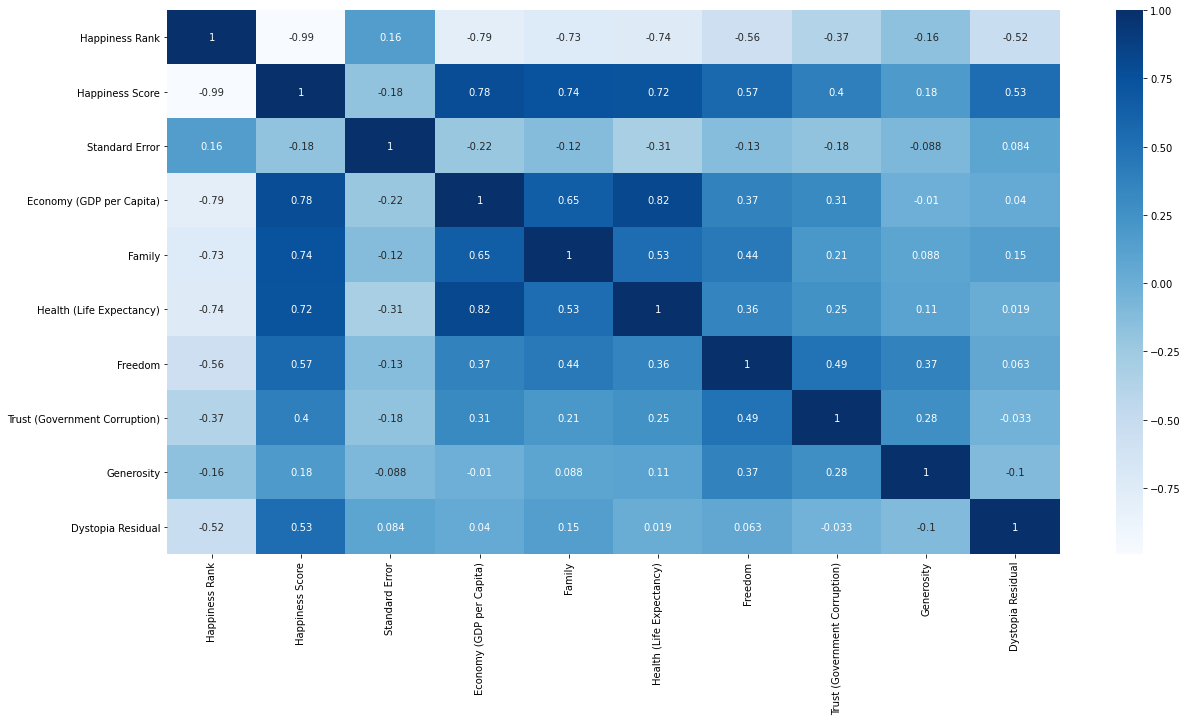

In [42]:
pyplt.rcParams['figure.figsize'] = (20, 10)

nrtham = dataf.loc[lambda dataf: dataf['Region'] == 'North America']
snsb.heatmap(dataf.corr(), cmap = 'Blues', annot = True)

pyplt.show()

As we discuss about the North America the two country which is well known as America and Canada in terms of Happiness Score  are highly corelated with Family, Health, Freedom, Turst and Generosity.

####  Economy VS Family VS Health of North America

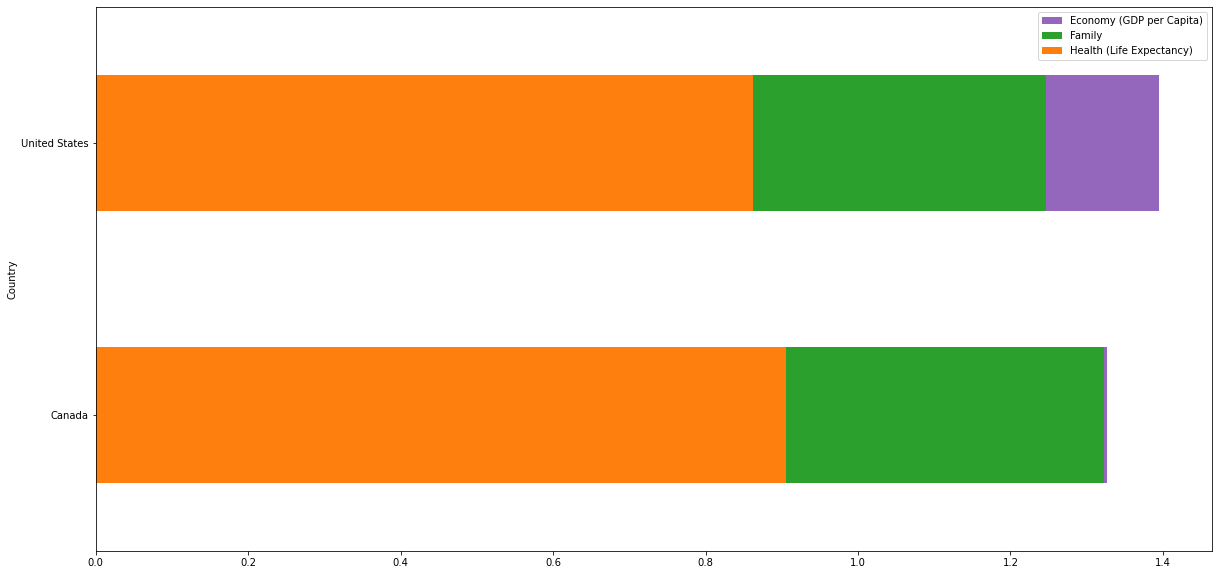

In [43]:

ax = nrtham.plot(y="Economy (GDP per Capita)", x="Country", kind='barh',color='C4')
nrtham.plot(y="Family", x="Country", kind="barh", ax=ax, color="C2")
nrtham.plot(y="Health (Life Expectancy)", x="Country", kind="barh", ax=ax, color="C1")

pyplt.show()




#### Correlation with Middle East and North Africa

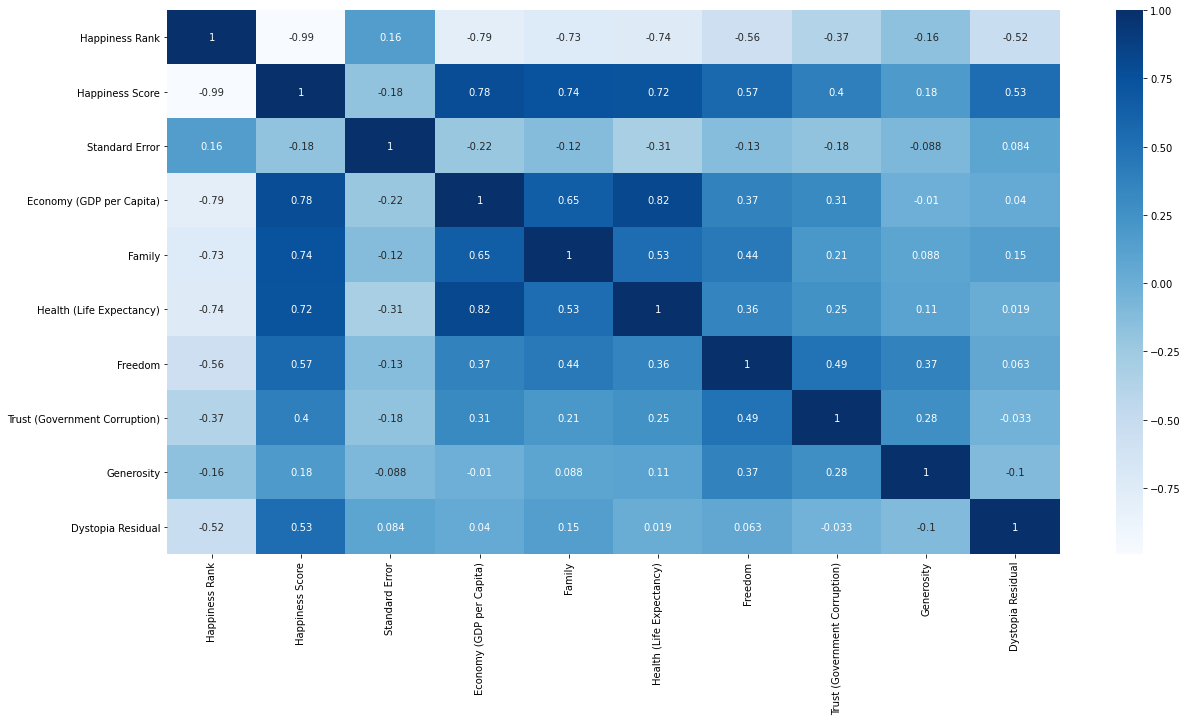

In [44]:
pyplt.rcParams['figure.figsize'] = (20, 10)

mena = dataf.loc[lambda dataf: dataf['Region'] == 'Middle East and Northern Africa']
snsb.heatmap(dataf.corr(), cmap = 'Blues', annot = True)

pyplt.show()

#### Economy VS Family VS Health of Middle East and Northern Africa

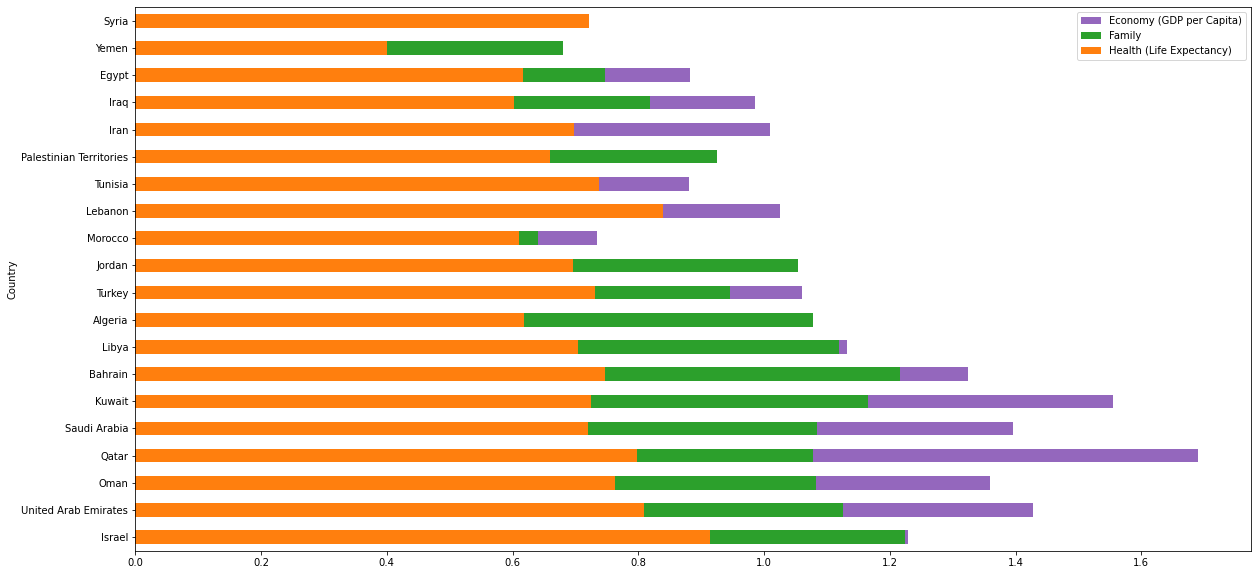

In [45]:

ax = mena.plot(y="Economy (GDP per Capita)", x="Country", kind='barh',color='C4')
mena.plot(y="Family", x="Country", kind="barh", ax=ax, color="C2")
mena.plot(y="Health (Life Expectancy)", x="Country", kind="barh", ax=ax, color="C1")

pyplt.show()




##### Ploting the pairwise relation in the dataset

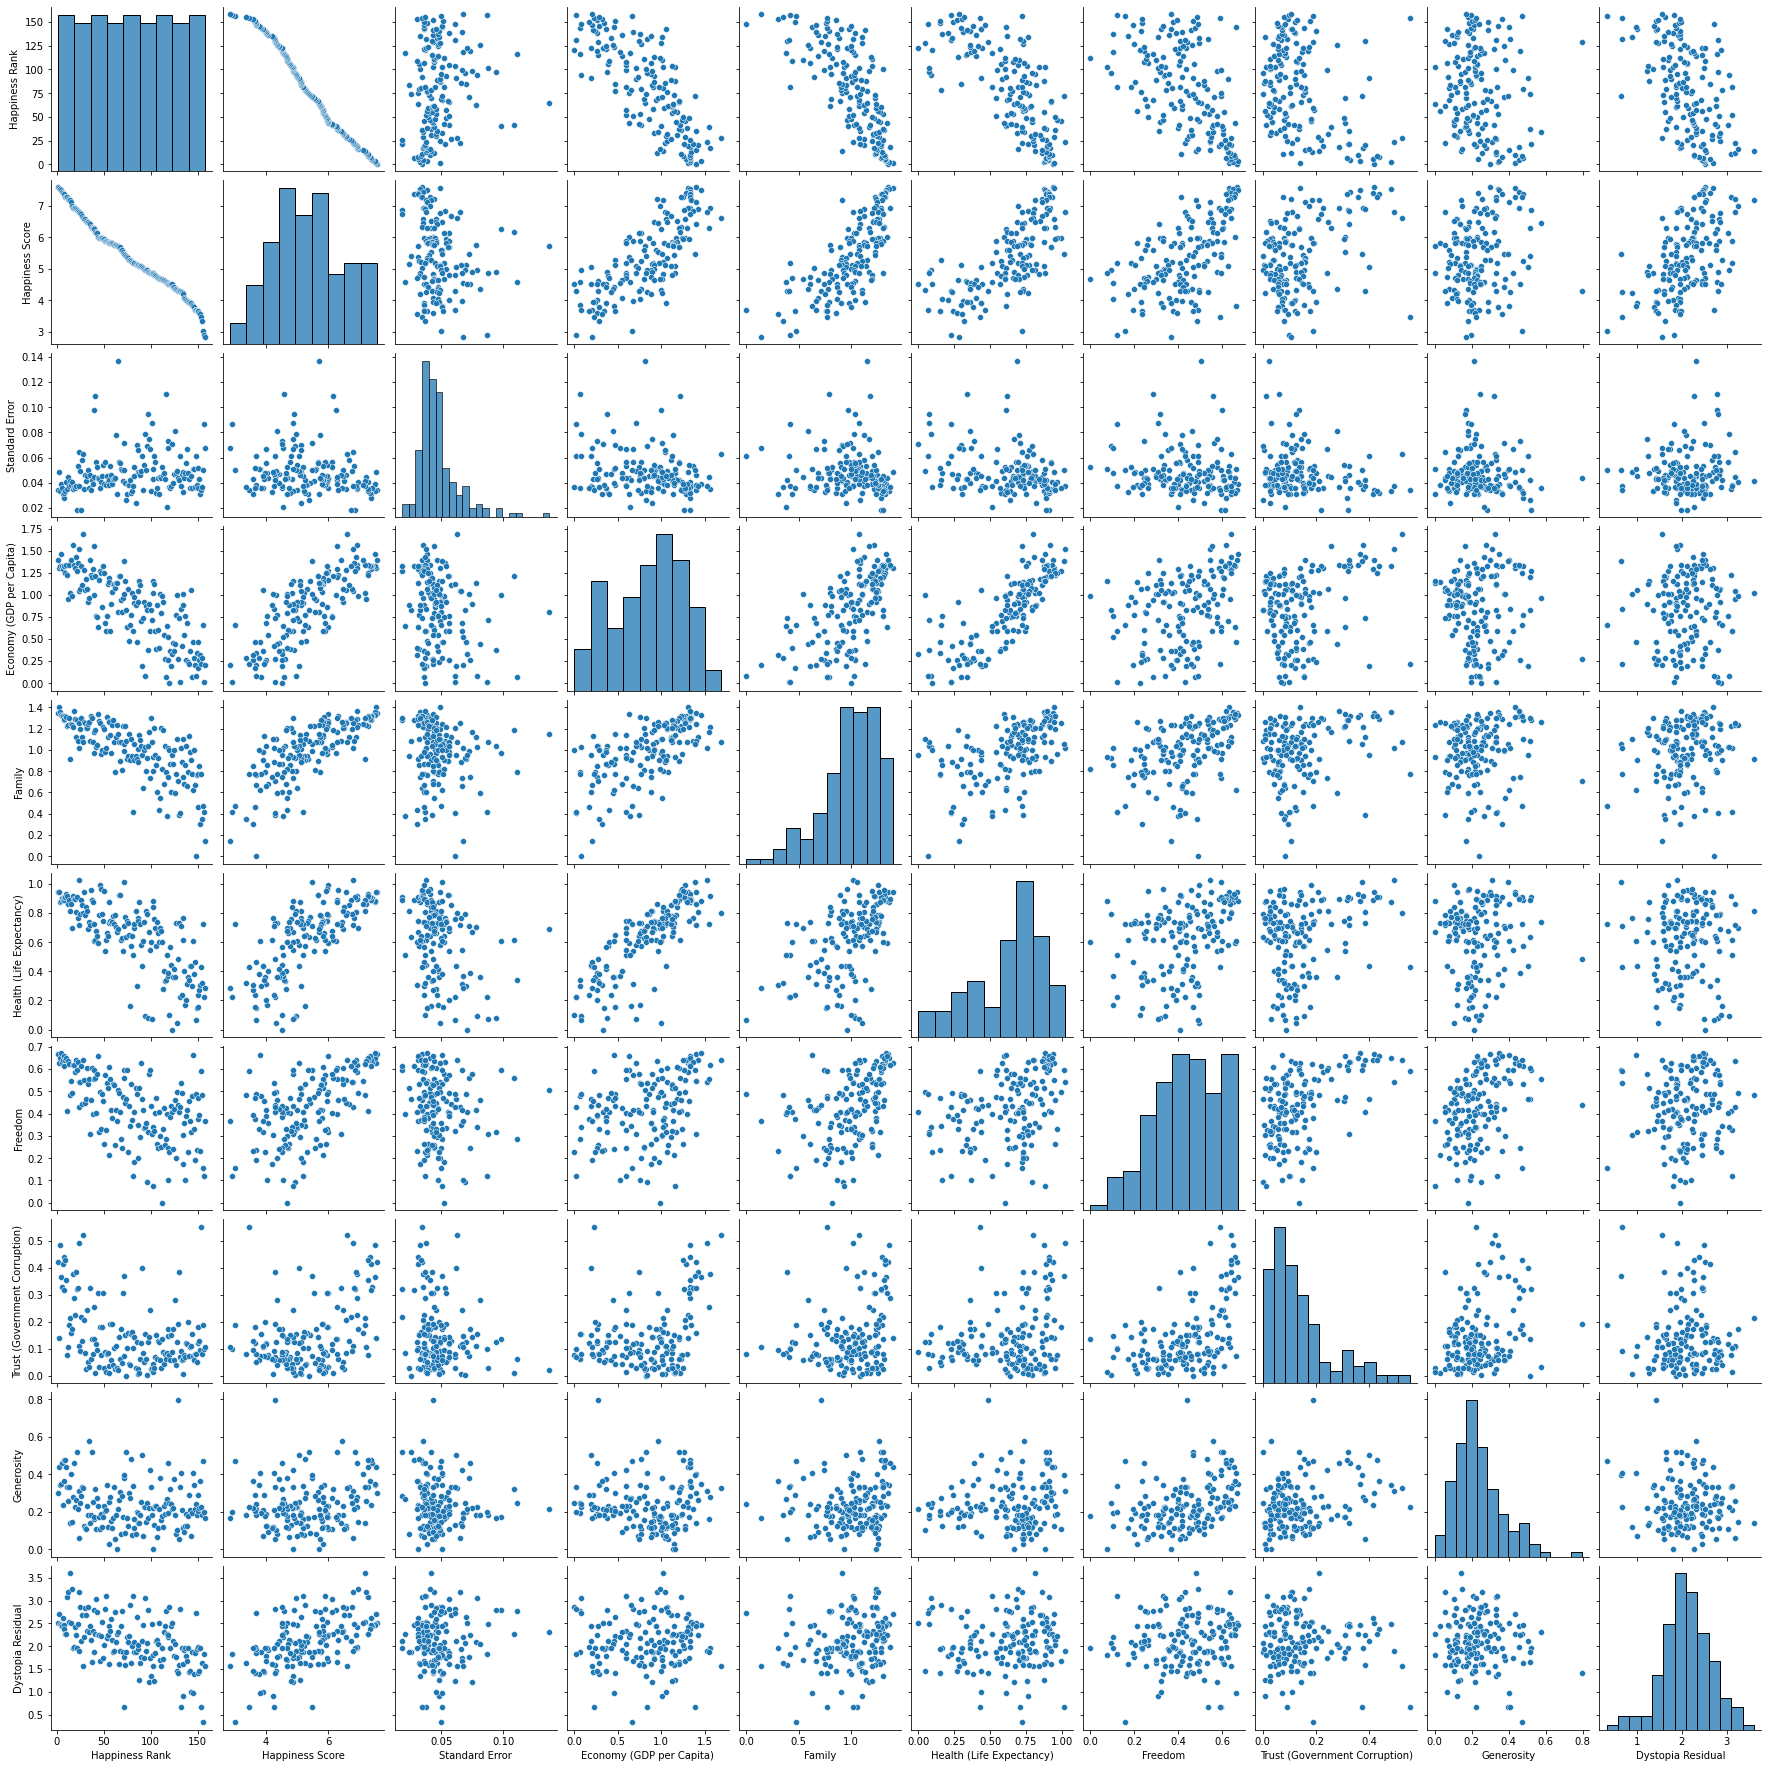

In [46]:
snsb.pairplot(dataf)

####  Comparing all the Data Represented  with top 10 countries 

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

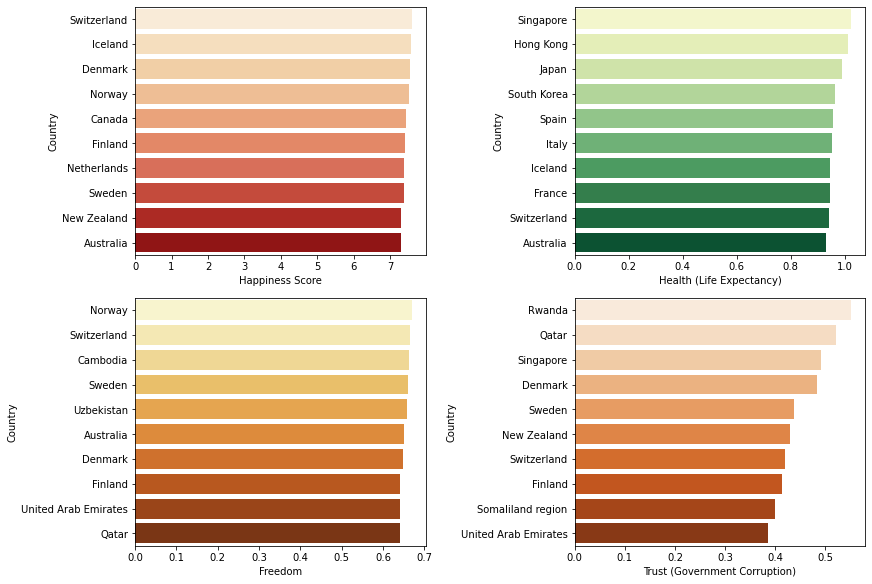

In [47]:
fig, axes = pyplt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))


snsb.barplot(x='Happiness Score',y='Country',data=dataf.nlargest(10,'Happiness Score'),ax=axes[0,0],palette="OrRd")

snsb.barplot(x='Health (Life Expectancy)',y='Country',data=dataf.nlargest(10,'Health (Life Expectancy)'),ax=axes[0,1],palette="YlGn")

snsb.barplot(x='Freedom',y='Country',data=dataf.nlargest(10,'Freedom'),ax=axes[1,0],palette="YlOrBr")

snsb.barplot(x='Trust (Government Corruption)',y='Country',data=dataf.nlargest(10,'Trust (Government Corruption)'),ax=axes[1,1],palette="Oranges")


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Country'>

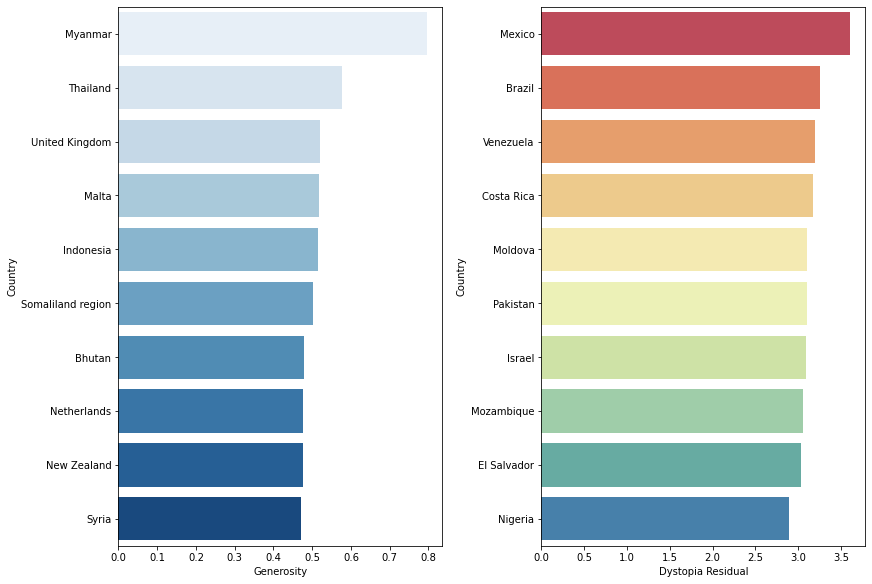

In [48]:

figu, aixes = pyplt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(12,8))



snsb.barplot(x='Generosity',y='Country',data=dataf.nlargest(10,'Generosity'),ax=aixes[0],palette="Blues")

snsb.barplot(x='Dystopia Residual',y='Country',data=dataf.nlargest(10,'Dystopia Residual'),ax=aixes[1],palette="Spectral")


###  Geographical Visulization of Happiness Score according to dataset.

In [49]:
import plotly.graph_objs as goo
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = dataf['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = dataf['Happiness Score'], 
           text = dataf['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness_Score', 
              geo = dict(showframe = True, projection = {'type': 'equirectangular'}))

choromap3 = goo.Figure(data = [data], layout=layout)
iplot(choromap3)

The Happiness Score represented according to the colorscale 